# PM 2.5 Dataset Analysis with Shanghai dataset

## 1. Prepare the dataset: Preprocessing
### 1.1 Deal with missing values

In [1]:
# Shanghai dataset
# Deal with missing values
import pandas as pd

In [2]:
shanghai_pd = pd.read_csv('/Users/kiyoshi/Desktop/17Fall/FDS/FDS_project_17Fall/dataset/FiveCitiePMData/ShanghaiPM20100101_20151231.csv')

In [3]:
# Drop unecessary columns
shanghai_pd_new = shanghai_pd.drop(['No', 'PM_Jingan', 'PM_Xuhui', 'Iprec', 'cbwd' ], axis=1)
# Delete space in headers
shanghai_pd_new.rename(columns={'PM_US Post':'PM_US_Post'}, inplace=True)
shanghai_pd_new.head(5)

,year,month,day,hour,season,PM_US_Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation
0,2010,1,1,0,4,NaN,-6.0,59.48,1026.1,1.0,1.0,0.0
1,2010,1,1,1,4,NaN,-6.0,59.48,1025.1,1.0,2.0,0.0
2,2010,1,1,2,4,NaN,-7.0,59.21,1025.1,0.0,4.0,0.0
3,2010,1,1,3,4,NaN,-6.0,63.94,1024.0,0.0,5.0,0.0
4,2010,1,1,4,4,NaN,-6.0,63.94,1023.0,0.0,8.0,0.0


In [4]:
# Check NA values
pd.isnull(shanghai_pd_new).sum()

year                 0
month                0
day                  0
hour                 0
season               0
PM_US_Post       18545
DEWP                13
HUMI                13
PRES                28
TEMP                13
Iws                 12
precipitation     4009
dtype: int64

In [5]:
# Drop NA values except for the target variable (PM_US Post)
shanghai_pd_new = shanghai_pd_new[pd.notnull(shanghai_pd_new['DEWP'])]
shanghai_pd_new = shanghai_pd_new[pd.notnull(shanghai_pd_new['PRES'])]
shanghai_pd_new = shanghai_pd_new[pd.notnull(shanghai_pd_new['precipitation'])]
pd.isnull(shanghai_pd_new).sum()

year                 0
month                0
day                  0
hour                 0
season               0
PM_US_Post       16669
DEWP                 0
HUMI                 0
PRES                 0
TEMP                 0
Iws                  0
precipitation        0
dtype: int64

In [6]:
"""
# Covert cbwd from category value to numerical value
shanghai_pd_new.cbwd = pd.Categorical(shanghai_pd_new.cbwd)
shanghai_pd_new['code']=shanghai_pd_new.cbwd.astype('category').cat.codes
shanghai_pd_new
"""

"\n# Covert cbwd from category value to numerical value\nshanghai_pd_new.cbwd = pd.Categorical(shanghai_pd_new.cbwd)\nshanghai_pd_new['code']=shanghai_pd_new.cbwd.astype('category').cat.codes\nshanghai_pd_new\n"

In [7]:
# Convert target (PM_US Post) into category data
# Get the description of PM2.5 
import numpy as np
pm_range = shanghai_pd_new['PM_US_Post'].max()-shanghai_pd_new['PM_US_Post'].min()

print shanghai_pd_new['PM_US_Post'].describe()
print "range: " + str(pm_range)

count    31880.000000
mean        53.411888
std         43.064480
min          1.000000
25%         26.000000
50%         42.000000
75%         67.000000
max        730.000000
Name: PM_US_Post, dtype: float64
range: 729.0


### 1.2 Add labels for the dataset

In [8]:
# Define the ranges and convert to categories
labels = [ "{0}".format(i) for i in range(1, 8) ]
shanghai_pd_new['pm_group'] = pd.cut(shanghai_pd_new.PM_US_Post, range(0, 800, 100), right=False, labels=labels)

In [9]:
# Drop unecessary columns
shanghai_pd_new = shanghai_pd_new.drop(['year', 'month', 'day', 'hour'], axis=1)

In [10]:
pd.isnull(shanghai_pd_new).sum()

season               0
PM_US_Post       16669
DEWP                 0
HUMI                 0
PRES                 0
TEMP                 0
Iws                  0
precipitation        0
pm_group         16670
dtype: int64

## 2. Correlation Analysis

In [11]:
# Take the records with missing values as test set, and others as training/validation set
test = shanghai_pd_new.loc[pd.isnull(shanghai_pd_new['PM_US_Post'])== True]
train_valid = shanghai_pd_new.loc[pd.isnull(shanghai_pd_new['PM_US_Post'])== False]

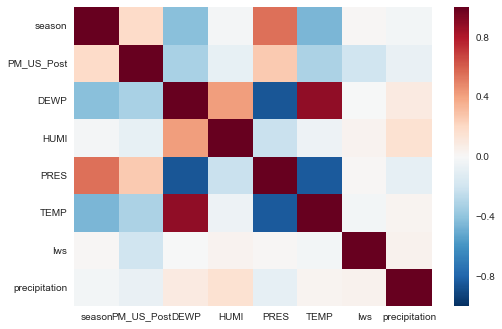

In [12]:
# Calculate correlation matrix using train_valid set
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_valid.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
#print corr
plt.show()

 ### Correlation with target (PM_US Post)

        season: 0.192910
        DEWP: -0.327131
        HUMI: -0.083215
        PRES: 0.258770
        TEMP: -0.319097
        Iws: -0.199504
        precipitation: -0.071507

## 3. Split dataset and build model
### 3.1 Decision Tree

In [13]:
# Drop PS_Post
test = test.drop(['PM_US_Post'],axis=1)
train_valid = train_valid.drop(['PM_US_Post'],axis=1)

In [14]:
test.head(5)

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,pm_group
0,4,-6.0,59.48,1026.1,1.0,1.0,0.0,NaN
1,4,-6.0,59.48,1025.1,1.0,2.0,0.0,NaN
2,4,-7.0,59.21,1025.1,0.0,4.0,0.0,NaN
3,4,-6.0,63.94,1024.0,0.0,5.0,0.0,NaN
4,4,-6.0,63.94,1023.0,0.0,8.0,0.0,NaN


In [15]:
train_valid.head(5)

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,pm_group
17442,4,4.0,62.00,1027.1,11.0,8.0,0.0,1
17443,4,4.0,62.00,1027.1,11.0,9.0,0.0,1
17444,4,5.0,71.07,1028.1,10.0,11.0,0.0,1
17445,4,5.0,71.07,1028.1,10.0,13.0,0.0,1
17446,4,6.0,76.18,1028.1,10.0,15.0,0.0,1


In [16]:
# Seperate training data and valiadation set
shuffled_data = train_valid.iloc[np.random.permutation(len(train_valid))]
data = shuffled_data.reset_index(drop=True)
num_of_training = int(round(len(train_valid)*0.9))
shanghai_train = data[:num_of_training]
shanghai_train_new = shanghai_train.dropna(axis=0, how='any')
shanghai_valid = data[num_of_training:]

In [27]:
shanghai_train_new.head(5)
#shanghai_train_new['pm_group'].value_counts()

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,pm_group
0,1,-5.0,30.09,1027.0,12.0,3.0,0.0,1
1,2,21.0,52.35,1000.0,32.0,39.0,0.0,2
2,2,22.0,83.48,1007.0,25.0,32.0,0.9,1
3,3,20.0,73.84,1013.0,25.0,72.0,0.0,1
4,3,10.0,82.01,1023.0,13.0,161.0,0.0,1


- Number of total rows: 48548
- Number of rows in training_validation set: 31879
- Number of rows in test set: 16669

In [18]:
# Feature importance(Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Build the model and fit data
tree_model = DecisionTreeClassifier(criterion="entropy")
classifier = tree_model.fit(shanghai_train_new.drop(['pm_group'], axis=1), shanghai_train_new['pm_group'])

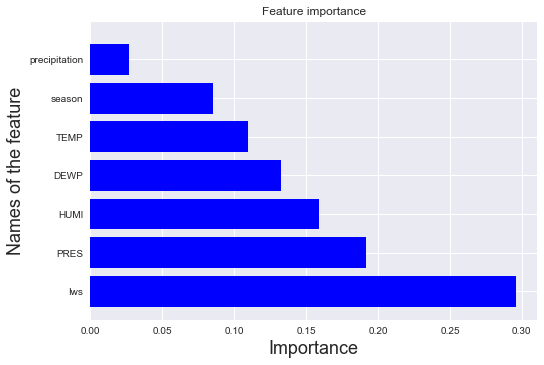

In [19]:
# Calculate importance
importance = classifier.feature_importances_
indices = np.argsort(importance)[::-1]  
name = list(shanghai_train_new.drop(['pm_group'], axis=1))
new_name = []
for i in range(7):
    new_name.append(name[indices[i]])

# Plot image
plt.figure()
plt.title("Feature importance")
plt.barh(range(len(new_name)),importance[indices], color="b", align="center")
plt.yticks(range(shanghai_train_new.shape[1]), new_name)
plt.xlabel("Importance", fontsize = 18)
plt.ylabel("Names of the feature", fontsize = 18)
plt.show()

In [20]:
from sklearn import metrics

# Do prediction on training set
training_df = shanghai_train_new.drop(['pm_group'], axis=1)
train_accuracy = metrics.accuracy_score(classifier.predict(training_df), shanghai_train_new['pm_group'])
print "Acuracy on training set is: " + str(train_accuracy)

# Do prediction on validation set
valid_df = shanghai_valid.drop(['pm_group'], axis=1)
test_accuracy = metrics.accuracy_score(classifier.predict(valid_df), shanghai_valid['pm_group'])
print "Acuracy on test set is: " + str(test_accuracy)


Acuracy on training set is: 0.996375169914
Acuracy on test set is: 0.866373902133


### 3.2 Logistic Regression

In [23]:
# Build model and do prediction
from sklearn import linear_model
from sklearn.metrics import roc_auc_score, roc_curve, auc

LR_model = linear_model.LogisticRegression(C = 1e30)
LR_model.fit(shanghai_train_new.drop('pm_group', 1), shanghai_train_new['pm_group'])
LR_prediction = LR_model.predict(shanghai_valid.drop('pm_group', 1))
test_accuracy = metrics.accuracy_score(LR_prediction, shanghai_valid['pm_group'])
print test_accuracy

0.884880803011


### 3.3 KNN

In [32]:
# Build model and do prediction
from sklearn import neighbors

neigh = neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(shanghai_train_new.drop('pm_group', 1), shanghai_train_new['pm_group'])
neigh_predic = neigh.predict(shanghai_valid.drop('pm_group', 1))
test_accuracy = neigh.score(shanghai_valid['pm_group'], neigh_predic)

print test_accuracy

/Users/kiyoshi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: query data dimension must match training data dimension

### 3.4 SVM

In [22]:
# Build model and do prediction
from sklearn import svm

svm_model = svm.SVC(C=0.1, kernel='linear')
svm_model.fit(shanghai_train_new.drop('pm_group', 1), shanghai_train_new['pm_group'])
svm_p = svm_model.predict(shanghai_valid.drop('pm_group', 1))
test_accuracy = metrics.accuracy_score(svm_p, shanghai_valid['pm_group'])
print test_accuracy

0.884880803011
